In [ ]:
##### Lending Club Analysis #####

In [1]:
# import the required packages
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
# skip row 1 so pandas can parse the data properly.
loans = pd.read_csv('C:\Users\sound\Desktop\Sem 3 - DSBA\Machine Learning\Individual Project\lendingclub.csv', skiprows=1, low_memory=False) 
count = len(loans) * 0.80
print(count)
count = int(round(count))
print(count)
print(loans.shape)

# Drop any column with more than 80% missing values
loans = loans.dropna(thresh = count,axis=1) 

150546.4
150546
(188183, 115)


In [3]:
count1 = len(loans) * 0.70
count1 = int(round(count1))
print(loans.shape)

# Drop any column with more than 70% missing values
loans1 = loans.dropna(thresh = count1,axis=1) 
loans2 = loans.dropna(thresh = count1,axis=1)

(188183, 91)


In [4]:
loans1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Data columns (total 91 columns):
id                            188183 non-null object
member_id                     188181 non-null float64
loan_amnt                     188181 non-null float64
funded_amnt                   188181 non-null float64
funded_amnt_inv               188181 non-null float64
term                          188181 non-null object
int_rate                      188181 non-null object
installment                   188181 non-null float64
grade                         188181 non-null object
sub_grade                     188181 non-null object
emp_title                     176447 non-null object
emp_length                    188181 non-null object
home_ownership                188181 non-null object
annual_inc                    188181 non-null float64
verification_status           188181 non-null object
issue_d                       188181 non-null object
loan_status                   18818

In [5]:
#Study the first 10 attributes
loans1.iloc[:3,:10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,10129506,11981122.0,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5
1,10159498,1319523.0,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2
2,10129454,11981072.0,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2


In [6]:
# Drop id, member_id, sub_grade, funded_amnt, funded_amnt_inv
# funded_amnt and funded_amnt_inv leak data from future
loans2 = loans2.drop(['id','member_id','sub_grade', 'funded_amnt','funded_amnt_inv'],axis = 1)

In [7]:
# remove % from interest rate feature
loans2.int_rate = pd.Series(loans2.int_rate).str.replace('%', '').astype(float)

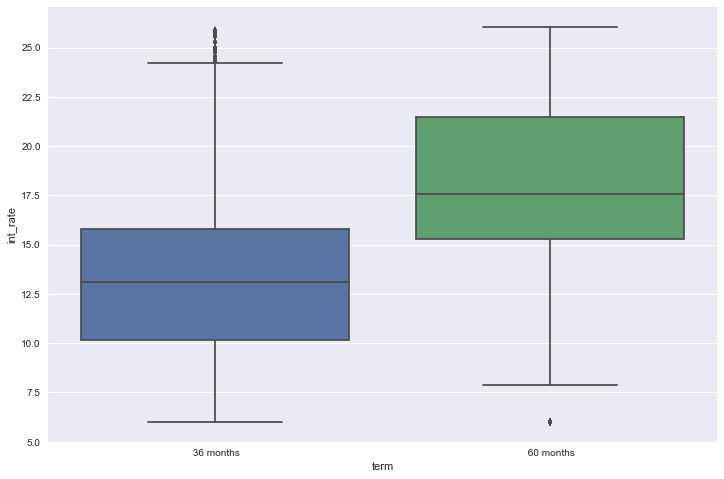

In [8]:
# Boxplot of interest rate Vs term
sb.boxplot(y = "int_rate", x="term", data = loans2)

In [9]:
#Study the attributes from 11 to 20
loans1.iloc[:3,10:20]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose
0,Operations Manager,10+ years,RENT,81500.0,Verified,Dec-13,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=10129506,debt_consolidation
1,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=10159498,debt_consolidation
2,Project Manager,4 years,RENT,60000.0,Not Verified,Dec-13,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=10129454,debt_consolidation


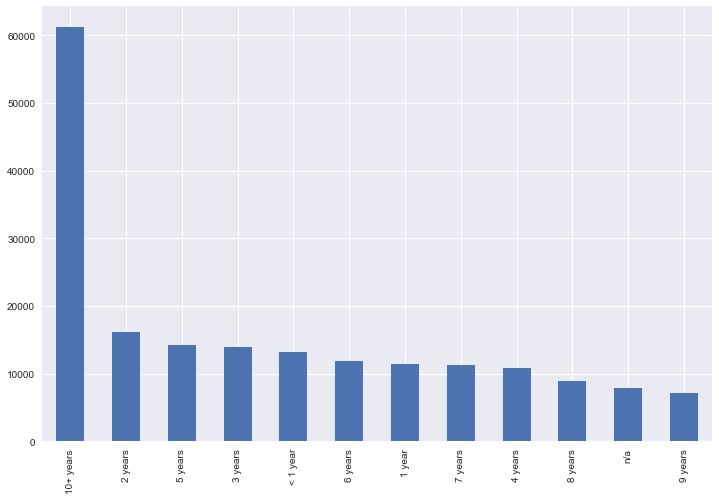

In [10]:
# Bar plot of employee years of experience
loans2['emp_length'].value_counts().plot(kind='bar')

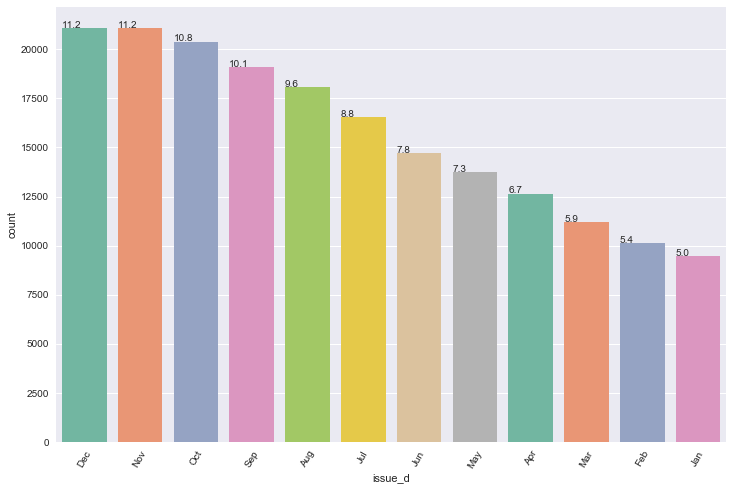

In [11]:
# number of loans issued month wise split up
loans2['issue_d'].replace(to_replace='[^A-Z,a-z]+', value='', inplace=True, regex=True)
ax = sb.countplot(x="issue_d", data=loans2, palette="Set2");
total = float(len(loans2.index))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+18, '%2.1f'%(height*100/total))
plt.xticks(rotation=60)
plt.show()

In [12]:
# drop emp_title, emp_length, payment_plan, url
# issue_d leaks data from future
loans2 = loans2.drop(['emp_title','emp_length','issue_d','pymnt_plan','url'],axis = 1)

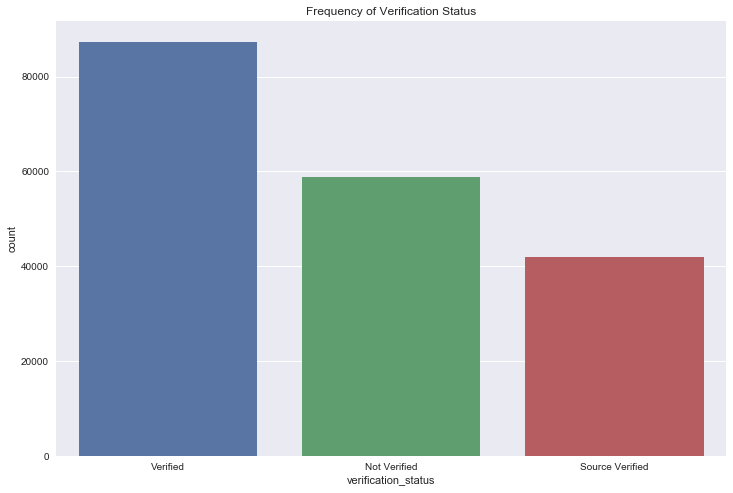

In [13]:
# Frequency of verification status
axs = sb.countplot(x='verification_status',data=loans2)
axs.set_title("Frequency of Verification Status")
plt.show()

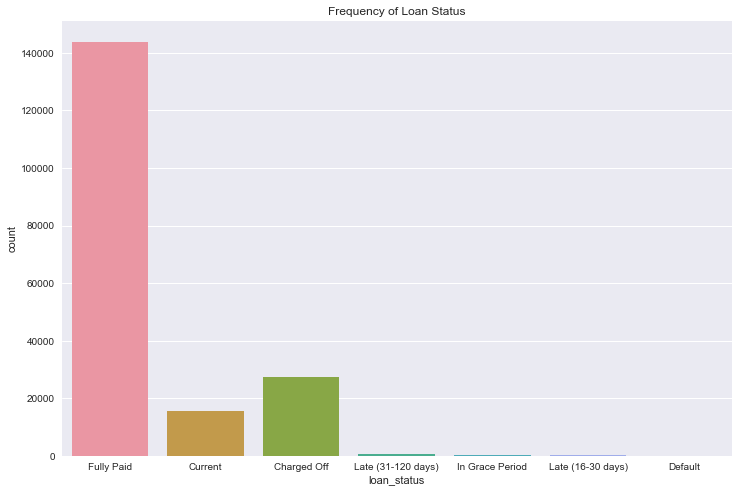

In [14]:
# Frequency of loan status
axs = sb.countplot(x='loan_status',data=loans2)
axs.set_title("Frequency of Loan Status")
plt.show()

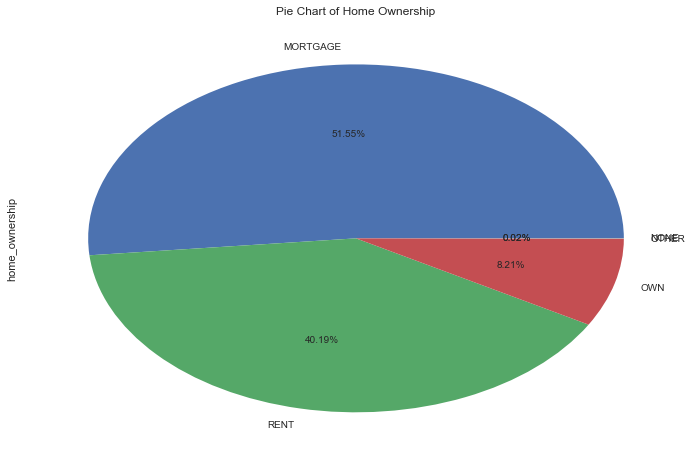

In [15]:
# Percentage classification of home ownership
axs = loans2.home_ownership.value_counts().plot(x=None,y=None, kind='pie', autopct='%1.2f%%')
axs.set_title("Pie Chart of Home Ownership")
plt.show()

purpose
car                     1951
credit_card            43170
debt_consolidation    111451
home_improvement       10297
house                   1093
major_purchase          3659
medical                 1519
moving                  1038
other                   8896
renewable_energy         122
small_business          2745
vacation                 909
wedding                 1331
Name: purpose, dtype: int64


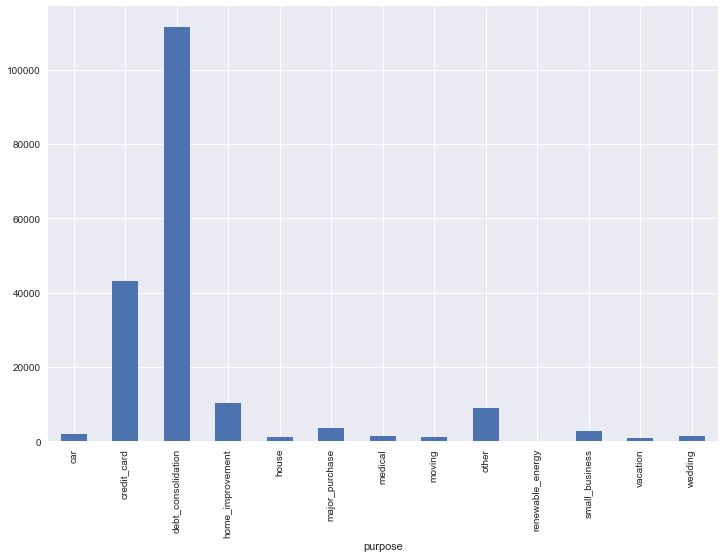

In [16]:
# Classification of loans by purpose
loans_by_purpose = loans2.groupby('purpose')
print(loans_by_purpose['purpose'].count())
loans_by_purpose['purpose'].count().plot(kind='bar')

In [17]:
#Study the attributes from 21 to 30
loans1.iloc[:3,20:30]

,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc
0,Reducing Debt to Purchase Home,100xx,NY,16.73,0.0,Jun-98,685.0,689.0,2.0,29.0
1,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,760.0,764.0,1.0,12.0
2,No Regrets,281xx,NC,4.62,0.0,Dec-09,720.0,724.0,1.0,15.0


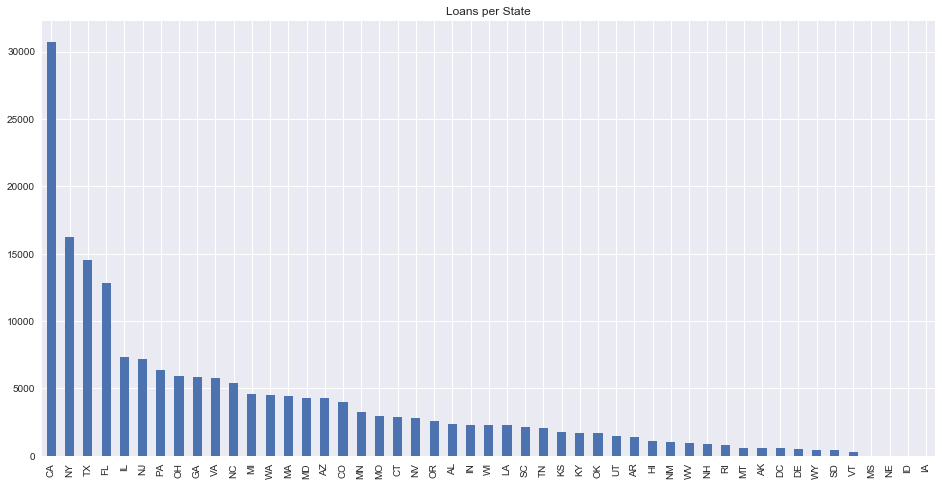

In [18]:
# State wise split of loans
state_count = loans2.addr_state.value_counts()
state_count.plot(kind = 'bar',figsize=(16,8), title = 'Loans per State')

In [19]:
# drop  title, zip_code, addr_state, earliest_cr_line
loans2 = loans2.drop(['title','zip_code','addr_state', 'earliest_cr_line'],axis = 1)

In [20]:
#Study the attributes from 31 to 40
loans1.iloc[:3,30:40]

,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,0.0,23473.0,54.50%,41.0,f,0.00,0.00,23926.64001,23926.64,20800.00
1,0.0,13168.0,21.60%,22.0,w,366.18,366.18,12895.75000,12895.75,11633.82
2,0.0,7137.0,24%,18.0,f,0.00,0.00,13988.61000,13988.61,12000.00


In [21]:
# remove % from revol_util feature
loans2.revol_util = pd.Series(loans2.revol_util).str.replace('%', '').astype(float)

In [22]:
# Drop out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp - leaks data from future
loans2 = loans2.drop(['out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'],axis = 1)

In [23]:
#Study the attributes from 41 to 50
loans1.iloc[:3,40:50]

,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med
0,3126.64,0.0,0.0,0.0,May-15,13334.93,Dec-16,644.0,640.0,0.0
1,1261.93,0.0,0.0,0.0,Dec-16,368.45,Dec-16,749.0,745.0,0.0
2,1988.61,0.0,0.0,0.0,Apr-16,3775.55,Dec-16,594.0,590.0,0.0


In [24]:
# drop recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_fico_range_high, last_fico_range_low,
# last_credit_pull_d - leaks information from future
loans2 = loans2.drop(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_fico_range_high', 
                      'last_fico_range_low', 'last_credit_pull_d', 'collections_12_mths_ex_med'],axis = 1)

In [25]:
#Study the attributes from 51 to 60
loans1.iloc[:3,50:60]

,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util
0,1.0,INDIVIDUAL,0.0,0.0,23473.0,43100.0,9.0,869.0,6811.0,54.6
1,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,4.0,26765.0,39432.0,25.0
2,1.0,INDIVIDUAL,0.0,0.0,7137.0,29700.0,8.0,476.0,15216.0,15.9


acc_now_delinq
0.0    187714
1.0       437
2.0        22
3.0         4
4.0         2
5.0         2
Name: acc_now_delinq, dtype: int64


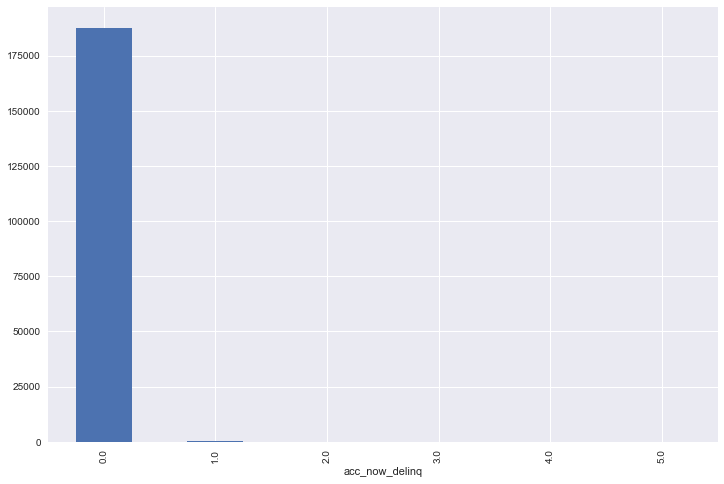

In [26]:
# Check delinquency values
loans_by_type = loans2.groupby('acc_now_delinq')
print(loans_by_type['acc_now_delinq'].count())
loans_by_type['acc_now_delinq'].count().plot(kind='bar')

In [27]:
# drop policy_code (has value for 1.0 only), application_type(only had INDIVIDUAL), acc_now_delinq(has mainly 0 and about 437 1.0)
# above features are not good to use in analysis
loans2 = loans2.drop(['policy_code','application_type','acc_now_delinq'],axis = 1)
loans2.shape

(188183, 61)

In [28]:
#Study the attributes from 61 to 70
loans1.iloc[:3,60:70]

,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd
0,0.0,0.0,115.0,186.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,146.0,237.0,20.0,3.0,4.0,20.0,3.0,0.0
2,0.0,0.0,NaN,48.0,1.0,1.0,0.0,1.0,3.0,0.0


In [29]:
# drop mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl
loans2 = loans2.drop(['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',],axis = 1)

In [30]:
#Study the attributes from 71 to 80
loans1.iloc[:3,70:80]

,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m
0,8.0,24.0,11.0,17.0,1.0,29.0,40.0,24.0,29.0,0.0
1,2.0,2.0,5.0,5.0,9.0,8.0,9.0,2.0,12.0,0.0
2,4.0,7.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,0.0


In [31]:
#Study the attributes from 81 to 90
loans1.iloc[:3,80:90]

,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit
0,0.0,0.0,3.0,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0
1,0.0,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0
2,0.0,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0


In [32]:
#Study the attributes from 91 to 100
loans1.iloc[:3,90:100]

,total_il_high_credit_limit
0,0.0
1,42769.0
2,0.0


In [33]:
loans2.columns.shape
loans2.columns

Index([u'loan_amnt', u'term', u'int_rate', u'installment', u'grade',
       u'home_ownership', u'annual_inc', u'verification_status',
       u'loan_status', u'purpose', u'dti', u'delinq_2yrs', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'open_acc', u'pub_rec',
       u'revol_bal', u'revol_util', u'total_acc', u'initial_list_status',
       u'total_rec_int', u'total_rec_late_fee', u'tot_coll_amt',
       u'tot_cur_bal', u'total_rev_hi_lim', u'acc_open_past_24mths',
       u'avg_cur_bal', u'bc_open_to_buy', u'bc_util',
       u'chargeoff_within_12_mths', u'delinq_amnt', u'mort_acc',
       u'mths_since_recent_bc', u'mths_since_recent_inq',
       u'num_accts_ever_120_pd', u'num_actv_bc_tl', u'num_actv_rev_tl',
       u'num_bc_sats', u'num_bc_tl', u'num_il_tl', u'num_op_rev_tl',
       u'num_rev_accts', u'num_rev_tl_bal_gt_0', u'num_sats',
       u'num_tl_120dpd_2m', u'num_tl_30dpd', u'num_tl_90g_dpd_24m',
       u'num_tl_op_past_12m', u'pct_tl_nvr_dlq', u'percent_bc

In [34]:
#Calculate mean value of fico scores
loans2['fico_score'] = 0.5*(loans2['fico_range_high'] + loans2['fico_range_low'])
loans2.drop(['fico_range_high'],1, inplace=True)
loans2.drop(['fico_range_low'],1, inplace=True)

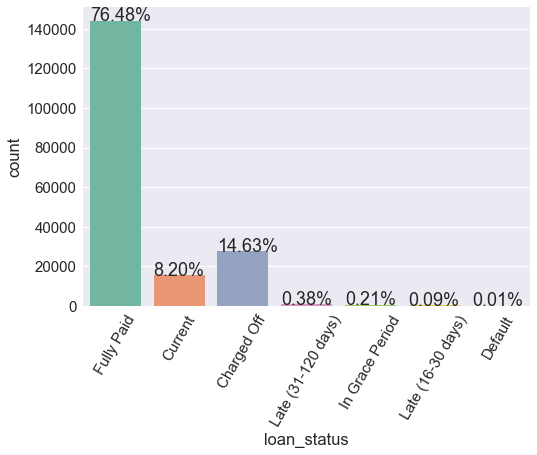

In [35]:
# Percentage split of loan_status
sb.set()
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
total = float(len(loans2.index))
ax = sb.countplot(x="loan_status", data=loans2, palette="Set2");
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+18, '%2.2f'%(height*100/total)+"%")
plt.xticks(rotation=60)
plt.show()

In [36]:
# defaultList = ["Late (31-120 days)", "Late (16-30 days)", "In Grace Period","Default", "Charged Off"]
defaultList = ["Late (31-120 days)", "Late (16-30 days)", "In Grace Period","Default", "Charged Off"]
loans2.loc[loans2.loan_status.isin(defaultList), "loan_status"] = "Default"
PaidList = ["Fully Paid"]
loans2.loc[loans2.loan_status.isin(PaidList), "loan_status"] = "Paid"

In [37]:
# Exclude current loans from the dataset
loans2 = loans2[loans2.loan_status != "Current"]

In [38]:
print len(loans2)

172753


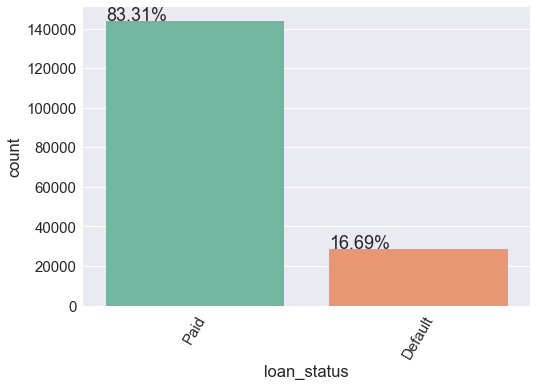

In [39]:
# plot new values for loan status - Paid and Default
sb.set()
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
total = float(len(loans2.index))
ax = sb.countplot(x="loan_status", data=loans2, palette="Set2");
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+18, '%2.2f'%(height*100/total)+"%")
plt.xticks(rotation=60)
plt.show()

In [40]:
np.isnan(loans2.num_op_rev_tl).any()

True

In [41]:
# Count of nan values in 'num_' fields
print("num_accts_ever_120_pd = {}".format(len(loans2.num_accts_ever_120_pd) - loans2.num_accts_ever_120_pd.count()))
print("num_actv_bc_tl = {}".format(len(loans2.num_actv_bc_tl) - loans2.num_actv_bc_tl.count()))
print("num_actv_rev_tl = {}".format(len(loans2.num_actv_rev_tl) - loans2.num_actv_rev_tl.count()))
print("num_bc_sats = {}".format(len(loans2.num_bc_sats) - loans2.num_bc_sats.count()))
print("num_bc_tl = {}".format(len(loans2.num_bc_tl) - loans2.num_bc_tl.count()))
print("num_il_tl = {}".format(len(loans2.num_il_tl) - loans2.num_il_tl.count()))
print("num_op_rev_tl = {}".format(len(loans2.num_op_rev_tl) - loans2.num_op_rev_tl.count()))
print("num_rev_accts = {}".format(len(loans2.num_rev_accts) - loans2.num_rev_accts.count()))
print("num_rev_tl_bal_gt_0 = {}".format(len(loans2.num_rev_tl_bal_gt_0) - loans2.num_rev_tl_bal_gt_0.count()))
print("num_sats = {}".format(len(loans2.num_sats) - loans2.num_sats.count()))
print("num_tl_120dpd_2m = {}".format(len(loans2.num_tl_120dpd_2m) - loans2.num_tl_120dpd_2m.count()))
print("num_tl_30dpd = {}".format(len(loans2.num_tl_30dpd) - loans2.num_tl_30dpd.count()))
print("num_tl_90g_dpd_24m = {}".format(len(loans2.num_tl_90g_dpd_24m) - loans2.num_tl_90g_dpd_24m.count()))
print("num_tl_op_past_12m = {}".format(len(loans2.num_tl_op_past_12m) - loans2.num_tl_op_past_12m.count()))

num_accts_ever_120_pd = 26720
num_actv_bc_tl = 26720
num_actv_rev_tl = 26720
num_bc_sats = 15490
num_bc_tl = 26720
num_il_tl = 26720
num_op_rev_tl = 26720
num_rev_accts = 26720
num_rev_tl_bal_gt_0 = 26720
num_sats = 15490
num_tl_120dpd_2m = 26946
num_tl_30dpd = 26720
num_tl_90g_dpd_24m = 26720
num_tl_op_past_12m = 26720


In [42]:
# Replace null values with 0 in the num_ fields
loans2['num_il_tl'] = loans2['num_il_tl'].replace(np.nan, 0, regex=True)   
loans2['num_sats'] = loans2['num_sats'].replace(np.nan, 0, regex=True)
loans2['num_bc_sats'] = loans2['num_bc_sats'].replace(np.nan, 0, regex=True)
loans2['num_bc_tl'] = loans2['num_bc_tl'].replace(np.nan, 0, regex=True)
loans2['num_actv_bc_tl'] = loans2['num_actv_bc_tl'].replace(np.nan, 0, regex=True)

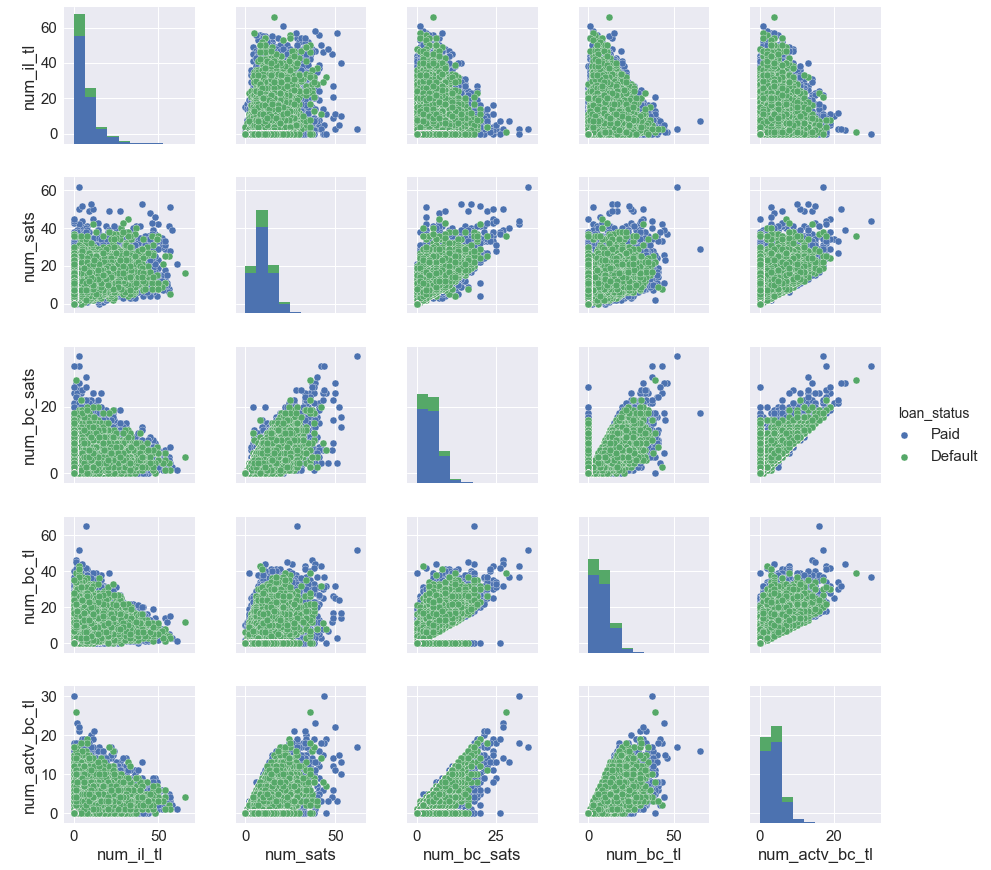

In [43]:
sb.pairplot(loans2, vars=["num_il_tl", "num_sats", "num_bc_sats", "num_bc_tl","num_actv_bc_tl"], hue="loan_status", dropna = True)

In [44]:
# Replace null values with 0 in the num_ fields
loans2['num_rev_accts'] = loans2['num_rev_accts'].replace(np.nan, 0, regex=True) 
loans2['num_actv_rev_tl'] = loans2['num_actv_rev_tl'].replace(np.nan, 0, regex=True)
loans2['num_rev_tl_bal_gt_0'] = loans2['num_rev_tl_bal_gt_0'].replace(np.nan, 0, regex=True)
loans2['num_op_rev_tl'] = loans2['num_op_rev_tl'].replace(np.nan, 0, regex=True)

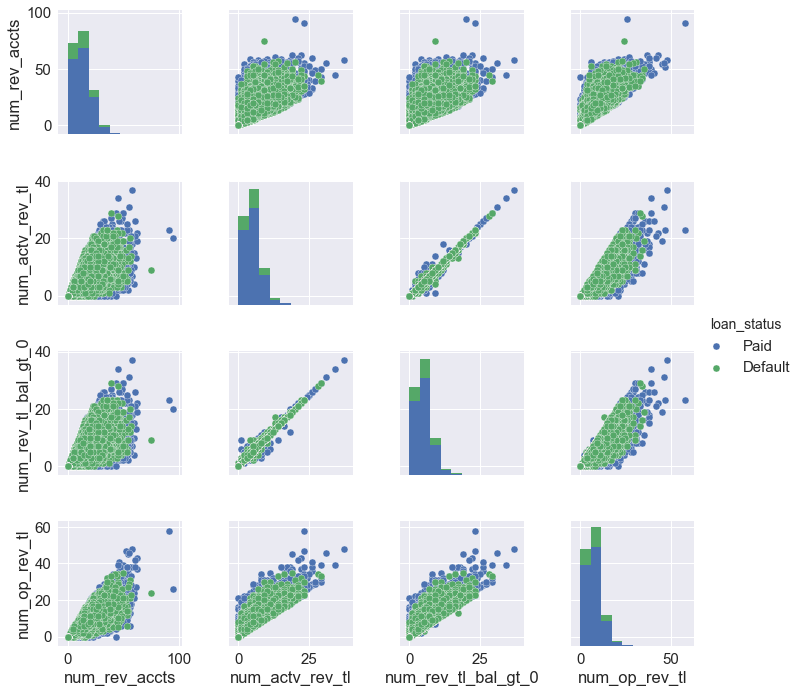

In [45]:
sb.pairplot(loans2, vars=["num_rev_accts", "num_actv_rev_tl", "num_rev_tl_bal_gt_0","num_op_rev_tl"], hue="loan_status", dropna = True)

In [46]:
# Replace null values with 0 in the num_ fields
loans2['num_accts_ever_120_pd'] = loans2['num_accts_ever_120_pd'].replace(np.nan, 0, regex=True) 
loans2['num_tl_120dpd_2m'] = loans2['num_tl_120dpd_2m'].replace(np.nan, 0, regex=True) 
loans2['num_tl_30dpd'] = loans2['num_tl_30dpd'].replace(np.nan, 0, regex=True)
loans2['num_tl_90g_dpd_24m'] = loans2['num_tl_90g_dpd_24m'].replace(np.nan, 0, regex=True)
loans2['num_tl_op_past_12m'] = loans2['num_tl_op_past_12m'].replace(np.nan, 0, regex=True)

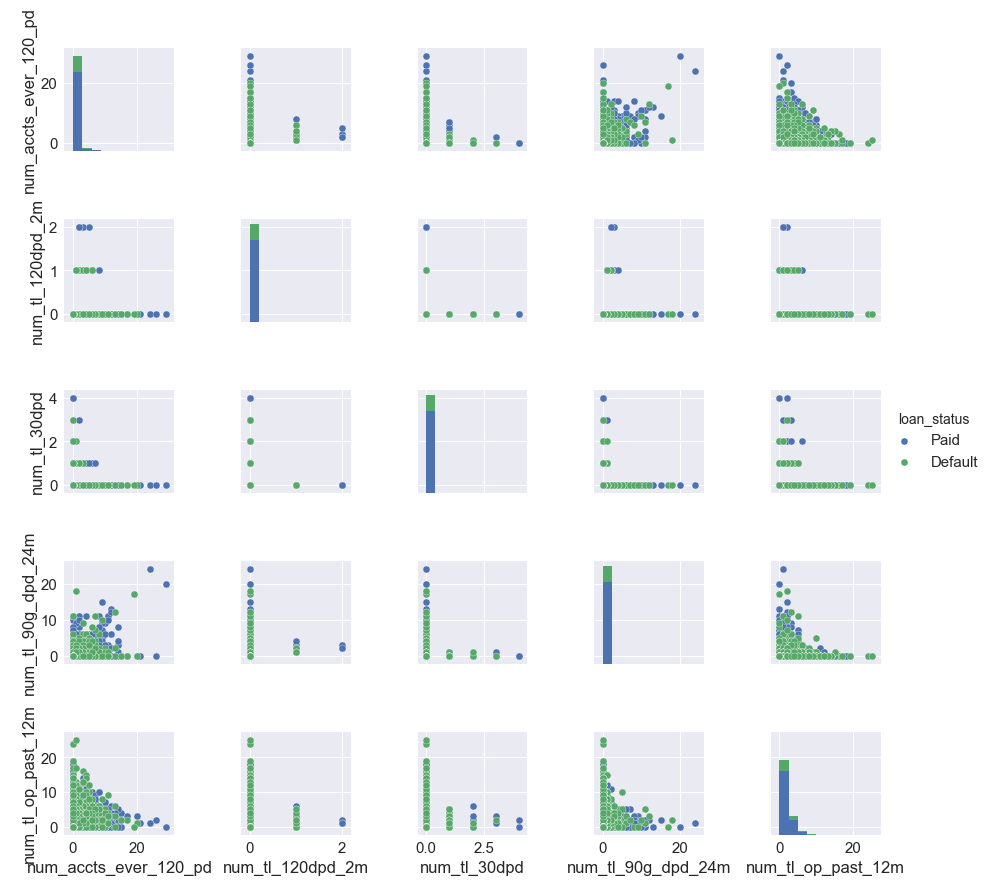

In [47]:
sb.pairplot(loans2, vars=["num_accts_ever_120_pd","num_tl_120dpd_2m", "num_tl_30dpd", 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m'], hue="loan_status", dropna = True)

In [48]:
# Check for multicollinearity using correlation values
cor = loans2.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.75) | (cor < -0.75)]

installment                 loan_amnt            0.962806
total_rev_hi_lim            revol_bal            0.801999
avg_cur_bal                 tot_cur_bal          0.850509
bc_util                     revol_util           0.839708
num_actv_rev_tl             num_actv_bc_tl       0.864242
num_bc_sats                 num_actv_bc_tl       0.792553
num_op_rev_tl               num_actv_bc_tl       0.767088
                            num_actv_rev_tl      0.871636
num_rev_accts               num_bc_tl            0.906008
                            num_op_rev_tl        0.835060
num_rev_tl_bal_gt_0         num_actv_bc_tl       0.863291
                            num_actv_rev_tl      0.999036
                            num_op_rev_tl        0.872500
num_sats                    open_acc             0.823492
                            num_op_rev_tl        0.766288
percent_bc_gt_75            bc_util              0.831834
pub_rec_bankruptcies        pub_rec              0.758693
tot_hi_cred_li

In [49]:
# Creating the new attribute num_accounts by consolidation of some useful attributes
loans2['num_accounts'] = loans2['num_actv_bc_tl'] + loans2['num_rev_tl_bal_gt_0'] + loans2['num_bc_sats']

In [50]:
loans2.drop(['num_accts_ever_120_pd','num_tl_120dpd_2m', 'num_tl_30dpd'],1, inplace=True)

In [51]:
loans2.drop(['num_actv_bc_tl','num_rev_tl_bal_gt_0','num_bc_sats'],1, inplace=True)

In [52]:
loans2.drop(['num_sats','num_rev_accts','num_op_rev_tl','num_actv_rev_tl'],1, inplace=True)

In [53]:
# Checking the final number of features before correlation
loans2.shape

(172753, 47)

In [54]:
# Checking correlation once again to remove high collinear attributes if any
cor = loans2.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.80) | (cor < -0.80)]

installment                 loan_amnt            0.962806
total_rev_hi_lim            revol_bal            0.801999
avg_cur_bal                 tot_cur_bal          0.850509
bc_util                     revol_util           0.839708
percent_bc_gt_75            bc_util              0.831834
tot_hi_cred_lim             tot_cur_bal          0.983919
                            avg_cur_bal          0.822235
total_bc_limit              bc_open_to_buy       0.846804
total_il_high_credit_limit  total_bal_ex_mort    0.842432
dtype: float64

In [55]:
# Drop tot_Cur bal since its highly correlated and use avg_cur_bal instead
# Also instalment is not relevant now and could be considered a leakage
loans2.drop(['tot_cur_bal','installment'],1, inplace=True)

In [56]:
loans2_dtypes = pd.DataFrame(loans2.dtypes,columns=['dtypes'])

In [57]:
print("Data types and their frequency\n{}".format(loans2.dtypes.value_counts()))

Data types and their frequency
float64    38
object      7
dtype: int64


In [58]:
object_columns_df = loans2.select_dtypes(include=['object'])
float_columns_df = loans2.select_dtypes(include = ['float64'])

In [59]:
# drop attributes with type object for imputing numeric variables
for col in float_columns_df:
    loans2.drop([col],axis=1,inplace=True)

In [60]:
# impute numeric attributes with median value
float_columns_df = float_columns_df.fillna(float_columns_df.median())

In [61]:
loans2 = loans2.join(float_columns_df)

In [62]:
# identify possible values with counts for categorical attributes
cols = ['grade','home_ownership','verification_status', 'loan_status','purpose', 'initial_list_status']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

('grade', ':')
(B    60174
C    43996
A    28089
D    25195
E     9916
F     4508
G      873
Name: grade, dtype: int64, '\n')
('home_ownership', ':')
(MORTGAGE    87372
RENT        71012
OWN         14284
OTHER          43
NONE           40
Name: home_ownership, dtype: int64, '\n')
('verification_status', ':')
(Verified           76357
Not Verified       58470
Source Verified    37924
Name: verification_status, dtype: int64, '\n')
('loan_status', ':')
(Paid       143919
Default     28832
Name: loan_status, dtype: int64, '\n')
('purpose', ':')
(debt_consolidation    101421
credit_card            39906
home_improvement        9410
other                   8346
major_purchase          3426
small_business          2605
car                     1839
medical                 1470
wedding                 1284
house                   1021
moving                  1014
vacation                 891
renewable_energy         118
Name: purpose, dtype: int64, '\n')
('initial_list_status', ':')
(f    136

In [63]:
# Process term attribute - remove months in the term and retain only the number
loans2.term = pd.Series(loans2.term).str.replace(' months', '')
#replace missing values for Term with max value
loans2.term = loans2.term.fillna(int(loans2['term'].value_counts().idxmax()))

In [64]:
#replace missing values for grade with max value
loans2.grade=loans2.grade.fillna(int(loans2['term'].value_counts().idxmax()))

#replace missing values for home_ownership, verification status and purpose with 'NOT AVAILABLE'
loans2.home_ownership=loans2.home_ownership.fillna("NOT_AVAILABLE")
loans2.verification_status=loans2.verification_status.fillna("NOT_AVAILABLE")
loans2.purpose=loans2.purpose.fillna("NOT_AVAILABLE")
loans2.initial_list_status = loans2.initial_list_status.fillna(loans2['initial_list_status'].value_counts().idxmax())

In [65]:
# remove rows with null values in these columns
loans2.dropna(subset=['loan_status','purpose', 'loan_amnt', 'term','int_rate'], how='any', inplace=True)

In [66]:
# Verify there are no more null values
null_counts = loans2.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
term                          0
grade                         0
home_ownership                0
verification_status           0
loan_status                   0
purpose                       0
initial_list_status           0
loan_amnt                     0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_int                 0
total_rec_late_fee            0
tot_coll_amt                  0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
chargeoff_within_12_mths      0
delinq_amnt                   0
mort_acc                      0
mths_since_recent_bc          0
mt

In [67]:
# get the count of loan_status attribute before splitting the dataset
from collections import Counter
Counter(loans2['loan_status'])

Counter({'Default': 28832, 'Paid': 143919})

In [68]:
poslist = ["Paid"]
loans2['loan_status']=loans2['loan_status'].isin(poslist).astype(int)

In [69]:
# Counts after changing Default to 0 and paid to 1.
from collections import Counter
Counter(loans2['loan_status'])

Counter({0: 28832, 1: 143919})

In [70]:
# Separate loan status to make it the dependent variable for further modeling
X = loans2.drop("loan_status", axis=1, inplace = False)
Y = loans2.loan_status

In [72]:
Y.shape

(172751L,)

In [73]:
# Creating dummy columns for all categorical variables
def model_matrix(df , columns):
    dummified_cols = pd.get_dummies(df[columns])
    df = df.drop(columns, axis = 1, inplace=False)
    df_new = df.join(dummified_cols)
    return df_new

X = model_matrix(X, ['term','grade', 'home_ownership', 'verification_status',
                    'purpose', 'initial_list_status'])

In [74]:
X.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_bc_tl,num_il_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_score,num_accounts,term_ 36,term_ 60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,20800.0,13.53,81500.0,16.73,0.0,2.0,29.0,0.0,23473.0,54.5,41.0,3126.64,0.0,0.0,43100.0,9.0,869.0,6811.0,54.6,0.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,3.0,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0,0.0,687.0,43.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,12000.0,10.99,60000.0,4.62,0.0,1.0,15.0,0.0,7137.0,24.0,18.0,1988.61,0.0,0.0,29700.0,8.0,476.0,15216.0,15.9,0.0,0.0,0.0,1.0,3.0,10.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0,722.0,19.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,12000.0,13.53,40000.0,16.94,0.0,0.0,7.0,2.0,5572.0,68.8,32.0,1359.78,0.0,15386.0,8100.0,4.0,2268.0,1428.0,79.6,0.0,0.0,0.0,11.0,17.0,14.0,8.0,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0,662.0,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,24000.0,13.53,100000.0,22.18,0.0,0.0,14.0,0.0,21617.0,76.7,39.0,4652.21,0.0,539.0,28200.0,7.0,15372.0,4822.0,77.6,0.0,0.0,3.0,18.0,7.0,10.0,17.0,0.0,2.0,100.0,75.0,0.0,0.0,229072.0,61397.0,21500.0,58847.0,662.0,13.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,28000.0,7.62,325000.0,18.55,0.0,1.0,15.0,0.0,29581.0,54.6,31.0,1150.98,0.0,0.0,54200.0,6.0,53306.0,13901.0,67.1,0.0,0.0,5.0,5.0,3.0,8.0,11.0,0.0,5.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0,747.0,15.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
# Standardizing the attributes
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
X[['loan_amnt','int_rate' ,'annual_inc','dti'  ,'delinq_2yrs' ,'inq_last_6mths','open_acc' ,'pub_rec' ,'revol_bal' ,'revol_util','total_acc',                   
'total_rec_int', 'total_rec_late_fee','tot_coll_amt',  'total_rev_hi_lim' , 'acc_open_past_24mths' ,      
'avg_cur_bal' ,'bc_open_to_buy','bc_util'  ,'chargeoff_within_12_mths',    
'delinq_amnt' ,'mort_acc' ,'mths_since_recent_bc' ,'mths_since_recent_inq' ,'num_bc_tl' ,'num_il_tl' ,'num_tl_90g_dpd_24m',          
'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75' ,'pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim',             
'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','fico_score', 'num_accounts']] = Scaler.fit_transform(X[['loan_amnt','int_rate' ,'annual_inc',
'dti'  ,'delinq_2yrs' ,'inq_last_6mths','open_acc' ,'pub_rec' ,'revol_bal' ,'revol_util','total_acc',                   
'total_rec_int', 'total_rec_late_fee','tot_coll_amt',  'total_rev_hi_lim' , 'acc_open_past_24mths',       
'avg_cur_bal' ,'bc_open_to_buy','bc_util'  ,'chargeoff_within_12_mths' ,   
'delinq_amnt' ,'mort_acc' ,'mths_since_recent_bc' ,'mths_since_recent_inq' ,'num_bc_tl' ,'num_il_tl' ,'num_tl_90g_dpd_24m',          
'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75' ,'pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim',             
'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','fico_score', 'num_accounts']])

In [76]:
X.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_bc_tl,num_il_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_score,num_accounts,term_ 36,term_ 60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,0.582353,0.375374,0.010747,0.478137,0.0,0.250,0.467742,0.000000,0.009137,0.388177,0.378641,0.125924,0.0,0.000000,0.00431,0.225,0.000907,0.013692,0.160777,0.0,0.0,0.000000,0.000000,0.000000,0.261538,0.015152,0.0,0.12,0.884706,0.500,0.0,0.0,0.004310,0.008876,0.028724,0.000000,0.134771,0.447917,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0.323529,0.248754,0.007734,0.132038,0.0,0.125,0.241935,0.000000,0.002778,0.170940,0.155340,0.080091,0.0,0.000000,0.00297,0.200,0.000497,0.030588,0.046820,0.0,0.0,0.000000,0.001805,0.125000,0.153846,0.000000,0.0,0.16,1.000000,0.000,0.0,0.0,0.002970,0.002699,0.034660,0.000000,0.323450,0.197917,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.323529,0.375374,0.004932,0.484138,0.0,0.000,0.112903,0.037037,0.002169,0.490028,0.291262,0.054765,0.0,0.204925,0.00081,0.100,0.002367,0.002871,0.234393,0.0,0.0,0.000000,0.019856,0.708333,0.215385,0.121212,0.0,0.08,0.778824,0.333,0.0,0.0,0.001813,0.005145,0.013405,0.008258,0.000000,0.072917,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.676471,0.375374,0.013339,0.633895,0.0,0.000,0.225806,0.000000,0.008415,0.546296,0.359223,0.187366,0.0,0.007179,0.00282,0.175,0.016045,0.009694,0.228504,0.0,0.0,0.096774,0.032491,0.291667,0.153846,0.257576,0.0,0.08,1.000000,0.750,0.0,0.0,0.022907,0.023217,0.041171,0.048452,0.000000,0.135417,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0.794118,0.080758,0.044865,0.530151,0.0,0.125,0.241935,0.000000,0.011515,0.388889,0.281553,0.046355,0.0,0.000000,0.00542,0.150,0.055638,0.027945,0.197585,0.0,0.0,0.161290,0.009025,0.125000,0.123077,0.166667,0.0,0.20,1.000000,0.167,0.0,0.0,0.085089,0.075532,0.080810,0.161942,0.458221,0.156250,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [77]:
# Splitting the data into training and testing - 75% and 25%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=123)

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(129563, 70)
(129563L,)
(43188, 70)
(43188L,)


In [79]:
# packages for logistic regression, naivebayes, KNN, decision tree, random forest

from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

E:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
# 10 fold cross validaton for GaussianNB

print "Model: Gaussian Naive Bayes"
nb = GaussianNB() 

precision_nb = cross_val_score(nb, x_train, np.ravel(y_train), cv=10, scoring='precision', n_jobs=-1)
print "Precision = {}".format(precision_nb.mean())
recall_nb = cross_val_score(nb, x_train, np.ravel(y_train), cv=10, scoring='recall', n_jobs=-1)
print "Recall    = {}".format(recall_nb.mean())
f1score_nb = cross_val_score(nb, x_train, np.ravel(y_train), cv=10, scoring='f1', n_jobs=-1)
print "F1 Score  = {}".format(f1score_nb.mean())
accuracy_nb = cross_val_score(nb, x_train, np.ravel(y_train), cv=10, scoring='accuracy', n_jobs=-1)
print "Accuracy  = {}".format(accuracy_nb.mean())

Model: Gaussian Naive Bayes
Precision = 0.882689605131
Recall    = 0.820508244059
F1 Score  = 0.85041044012
Accuracy  = 0.759622663204


In [81]:
# Naive Bayes to fit training and test data

naiveb = GaussianNB()

naiveb.fit(x_train, y_train.values.ravel())

nb_pred = naiveb.predict(x_test)

print metrics.confusion_matrix(y_test, nb_pred)
print metrics.classification_report(y_test, nb_pred)

print("Training score is ",naiveb.score(x_train, y_train))
print("Testing score is ",naiveb.score(x_test, y_test))

[[ 3185  4011]
 [ 6463 29529]]
             precision    recall  f1-score   support

          0       0.33      0.44      0.38      7196
          1       0.88      0.82      0.85     35992

avg / total       0.79      0.76      0.77     43188

('Training score is ', 0.76199223543758632)
('Testing score is ', 0.75747892933222194)


In [82]:
# 10 fold cross validaton for Logistic Regression

print "Model: Logistic Regression"
lr = LogisticRegression()

precision_lr = cross_val_score(lr, x_train, np.ravel(y_train), cv=10, scoring='precision', n_jobs=-1)
print "Precision = {}".format(precision_lr.mean())
recall_lr = cross_val_score(lr, x_train, np.ravel(y_train), cv=10, scoring='recall', n_jobs=-1)
print "Recall    = {}".format(recall_lr.mean())
f1score_lr = cross_val_score(lr, x_train, np.ravel(y_train), cv=10, scoring='f1', n_jobs=-1)
print "F1 Score  = {}".format(f1score_lr.mean())
accuracy_lr = cross_val_score(lr, x_train, np.ravel(y_train), cv=10, scoring='accuracy', n_jobs=-1)
print "Accuracy  = {}".format(accuracy_lr.mean())

Model: Logistic Regression
Precision = 0.84653645399
Recall    = 0.981978569423
F1 Score  = 0.909240752893
Accuracy  = 0.836697237557


In [83]:
# Logistic Regression to fit training and test data

logreg = LogisticRegression()

logreg.fit(x_train, y_train.values.ravel())

lr_pred = logreg.predict(x_test)

print metrics.confusion_matrix(y_test, lr_pred)
print metrics.classification_report(y_test, lr_pred)

print("Training score is ",logreg.score(x_train, y_train))
print("Testing score is ",logreg.score(x_test, y_test))


[[  722  6474]
 [  677 35315]]
             precision    recall  f1-score   support

          0       0.52      0.10      0.17      7196
          1       0.85      0.98      0.91     35992

avg / total       0.79      0.83      0.78     43188

('Training score is ', 0.83684385202565548)
('Testing score is ', 0.83442159859220155)


In [84]:
# 10 fold cross validaton for Decision Trees

print "Model: Decision Trees"
dt = DecisionTreeClassifier(criterion='entropy')

precision_dt = cross_val_score(dt, x_train, np.ravel(y_train), cv=10, scoring='precision', n_jobs=-1)
print "Precision = {}".format(precision_dt.mean())
recall_dt = cross_val_score(dt, x_train, np.ravel(y_train), cv=10, scoring='recall', n_jobs=-1)
print "Recall    = {}".format(recall_dt.mean())
f1score_dt = cross_val_score(dt, x_train, np.ravel(y_train), cv=10, scoring='f1', n_jobs=-1)
print "F1 Score  = {}".format(f1score_dt.mean())
accuracy_dt = cross_val_score(dt, x_train, np.ravel(y_train), cv=10, scoring='accuracy', n_jobs=-1)
print "Accuracy  = {}".format(accuracy_dt.mean())

Model: Decision Trees
Precision = 0.864705176018
Recall    = 0.854605421986
F1 Score  = 0.859308036611
Accuracy  = 0.767171204765


In [85]:
# Decision Tree to fit training and test data

infoGain_clf = DecisionTreeClassifier(criterion='entropy')

infoGain_clf.fit(x_train, y_train.values.ravel())

dt_pred = infoGain_clf.predict(x_test)

print metrics.confusion_matrix(y_test, dt_pred)
print metrics.classification_report(y_test, dt_pred)

print("Training score is ",infoGain_clf.score(x_train, y_train))
print("Testing score is ",infoGain_clf.score(x_test, y_test))

[[ 2379  4817]
 [ 5171 30821]]
             precision    recall  f1-score   support

          0       0.32      0.33      0.32      7196
          1       0.86      0.86      0.86     35992

avg / total       0.77      0.77      0.77     43188

('Training score is ', 1.0)
('Testing score is ', 0.76873205520051868)


In [86]:
# 10 fold cross validaton for KNN Classifier

print "Model: K Nearest Neighbor"
nn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')

precision_nn = cross_val_score(nn, x_train, np.ravel(y_train), cv=10, scoring='precision', n_jobs=-1)
print "Precision = {}".format(precision_nn.mean())
recall_nn = cross_val_score(nn, x_train, np.ravel(y_train), cv=10, scoring='recall', n_jobs=-1)
print "Recall    = {}".format(recall_nn.mean())
f1score_nn = cross_val_score(nn, x_train, np.ravel(y_train), cv=10, scoring='f1', n_jobs=-1)
print "F1 Score  = {}".format(f1score_nn.mean())
accuracy_nn = cross_val_score(nn, x_train, np.ravel(y_train), cv=10, scoring='accuracy', n_jobs=-1)
print "Accuracy  = {}".format(accuracy_nn.mean())

Model: K Nearest Neighbor
Precision = 0.84610327928
Recall    = 0.94764056931
F1 Score  = 0.8939968216
Accuracy  = 0.81280152302


In [87]:
# KNN to fit training and test data

knnclass = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')

knnclass.fit(x_train, y_train.values.ravel())

kn_pred = knnclass.predict(x_test)

print metrics.confusion_matrix(y_test, kn_pred)
print metrics.classification_report(y_test, kn_pred)

print("Training score is ",knnclass.score(x_train, y_train))
print("Testing score is ",knnclass.score(x_test, y_test))

[[  998  6198]
 [ 1900 34092]]
             precision    recall  f1-score   support

          0       0.34      0.14      0.20      7196
          1       0.85      0.95      0.89     35992

avg / total       0.76      0.81      0.78     43188

('Training score is ', 0.85495859157321152)
('Testing score is ', 0.81249421135500599)


In [88]:
# 10 fold cross validaton for Random Forest

print "Model: Random Forest"
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

precision_rf = cross_val_score(rf, x_train, np.ravel(y_train), cv=10, scoring='precision', n_jobs=-1)
print "Precision = {}".format(precision_rf.mean())
recall_rf = cross_val_score(rf, x_train, np.ravel(y_train), cv=10, scoring='recall', n_jobs=-1)
print "Recall    = {}".format(recall_rf.mean())
f1score_rf = cross_val_score(rf, x_train, np.ravel(y_train), cv=10, scoring='f1', n_jobs=-1)
print "F1 Score  = {}".format(f1score_rf.mean())
accuracy_rf = cross_val_score(rf, x_train, np.ravel(y_train), cv=10, scoring='accuracy', n_jobs=-1)
print "Accuracy  = {}".format(accuracy_rf.mean())

Model: Random Forest
Precision = 0.85664990145
Recall    = 0.945768900024
F1 Score  = 0.898694568815
Accuracy  = 0.823398765853


In [89]:
# Random Forest to fit training and test data

randomf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

randomf.fit(x_train, y_train.values.ravel())

rf_pred = randomf.predict(x_test)

print metrics.confusion_matrix(y_test, rf_pred)
print metrics.classification_report(y_test, rf_pred)

print("Training score is ",randomf.score(x_train, y_train))
print("Testing score is ",randomf.score(x_test, y_test))

[[ 1463  5733]
 [ 1957 34035]]
             precision    recall  f1-score   support

          0       0.43      0.20      0.28      7196
          1       0.86      0.95      0.90     35992

avg / total       0.78      0.82      0.79     43188

('Training score is ', 0.99256732246088775)
('Testing score is ', 0.82194127998518107)


In [90]:
### ROC plot preparation - roc_curve(true level,predicted outcome)
fpr, tpr, thresholds =roc_curve(y_test, lr_pred) 
roc_auc1 = auc(fpr, tpr)
print("Area under the ROC curve for Logistic Regression : %f" % roc_auc1)

fpr2, tpr2, thresholds2 =roc_curve(y_test, rf_pred)
roc_auc2 = auc(fpr2,tpr2)
print("Area under the ROC curve for Random Forest : %f" % roc_auc2)

fpr3, tpr3, thresholds3 =roc_curve(y_test, kn_pred)
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve for KNN classification : %f" % roc_auc3)

fpr4, tpr4, thresholds4 =roc_curve(y_test, nb_pred)
roc_auc4 = auc(fpr4, tpr4)
print("Area under the ROC curve for Naive Bayes : %f" % roc_auc4)

fpr5, tpr5, thresholds5 =roc_curve(y_test, dt_pred)
roc_auc5 = auc(fpr5, tpr5)
print("Area under the ROC curve for Decision Tree : %f" % roc_auc5)

Area under the ROC curve for Logistic Regression : 0.540762
Area under the ROC curve for Random Forest : 0.574467
Area under the ROC curve for KNN classification : 0.542949
Area under the ROC curve for Naive Bayes : 0.631520
Area under the ROC curve for Decision Tree : 0.593465


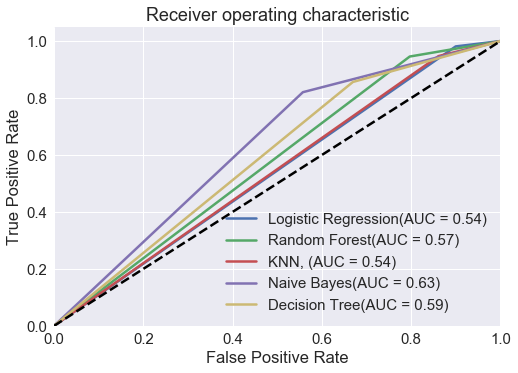

In [91]:
### Plot ROC plots
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2,tpr2,label='Random Forest(AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3,tpr3,label='KNN, (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4,tpr4,label='Naive Bayes(AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5,tpr5,label='Decision Tree(AUC = %0.2f)' % roc_auc5)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()